In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exploratory Data Analysis

In [2]:
accidents_data = pd.read_csv("D:\Python/data/US_Accidents_Dec21_updated.csv")
accidents_data.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


Look at null values

In [3]:
accidents_data.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

Now let's look at the number of unique values for each feature and label class

In [4]:
description = accidents_data.describe(include='all')
description.loc['unique', :]

ID                       2845342
Severity                     NaN
Start_Time               1959333
End_Time                 2351505
Start_Lat                    NaN
Start_Lng                    NaN
End_Lat                      NaN
End_Lng                      NaN
Distance(mi)                 NaN
Description              1174563
Number                       NaN
Street                    159651
Side                           3
City                       11681
County                      1707
State                         49
Zipcode                   363085
Country                        1
Timezone                       4
Airport_Code                2004
Weather_Timestamp         474214
Temperature(F)               NaN
Wind_Chill(F)                NaN
Humidity(%)                  NaN
Pressure(in)                 NaN
Visibility(mi)               NaN
Wind_Direction                24
Wind_Speed(mph)              NaN
Precipitation(in)            NaN
Weather_Condition            127
Amenity   

As we can see, both 'Country' and 'Turning_Loop' features contain only one value, so they won't be helpful during training our model.

Examine the distribution of label class

1      26053
2    2532991
3     155105
4     131193
Name: Severity, dtype: int64


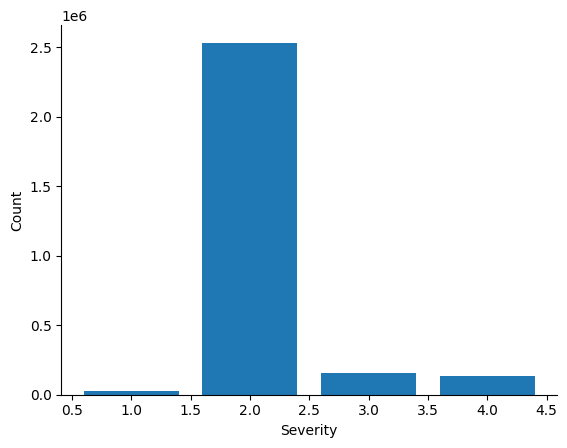

In [5]:
print(accidents_data['Severity'].value_counts().sort_index())

plt.figure()
plt.xlabel("Severity")
plt.ylabel("Count")
plt.bar(range(1,5),accidents_data['Severity'].value_counts().sort_index())
plt.gca().spines[['right', 'top']].set_visible(False);

As we can see, the distribution of severity class is highly imbalanced - most of the accidents are of severity 2.

Now, let's examine how weather conditions impact the frequency of accidents.

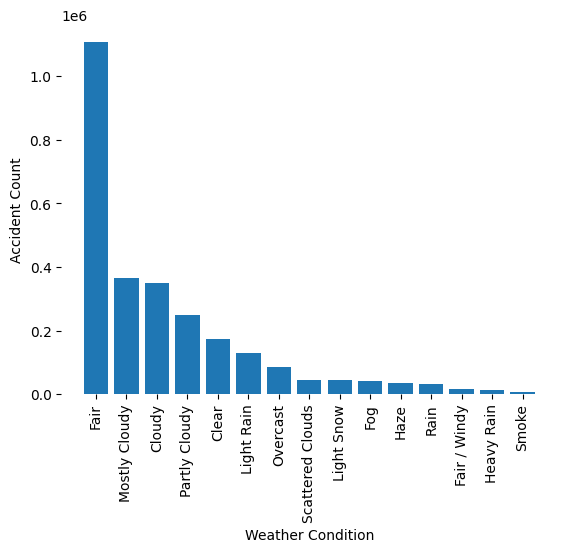

In [6]:
plt.figure()
plt.xlabel("Weather Condition")
plt.ylabel("Accident Count")
plt.bar(range(1,16), accidents_data['Weather_Condition'].value_counts().sort_values(ascending=False)[:15])
plt.xticks(range(1,16), accidents_data['Weather_Condition'].value_counts().sort_values(ascending=False)[:15].index, rotation=90)
plt.gca().set(frame_on=False);

This may give the impression that accidents are more probable in clear weather, but it could be due to the fact that clear weather occurs most frequently. Therefore, this may not be the most appropriate method to determine the probability of accidents based on weather conditions.

Let's now investigate how the day of the week influences the frequency of accidents. To do this, we first need to create a new feature: "Day_of_Week".

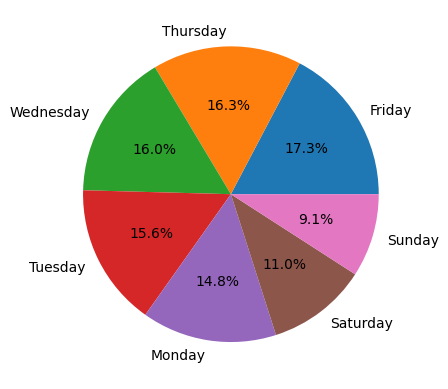

In [7]:
accidents_data['Start_Time'] = pd.to_datetime(accidents_data['Start_Time'], format='%Y-%m-%d %H:%M:%S')
accidents_data['End_Time'] = pd.to_datetime(accidents_data['End_Time'], format='%Y-%m-%d %H:%M:%S')
accidents_data['Day_of_Week'] = accidents_data['Start_Time'].dt.day_name()

plt.figure()
labels = accidents_data['Day_of_Week'].value_counts().index
plt.pie(accidents_data['Day_of_Week'].value_counts(), labels=labels, autopct='%1.1f%%', frame=False);

From the chart, it is evident that Sunday and Saturday have the lowest number of reported accidents since they are considered as rest days. On workdays, the number of accidents is roughly equal. However, Friday, which marks the start of the weekend, has the highest number of accidents recorded.

## Data Cleaning and Preprocessing, and Feature engineering

During the EDA, I included a new features called "Day_of_Week". Next, I plan to add another features such as the 'Duration' of accidents (which will involve subtracting the start time from the end time), 'Year', 'Month' and 'Hour'.

In [8]:
accidents_data['Duration']=round((accidents_data['End_Time']-accidents_data['Start_Time'])/np.timedelta64(1,'m'))
accidents_data['Year']=accidents_data['Start_Time'].dt.year
accidents_data['Month']=accidents_data['Start_Time'].dt.month
accidents_data['Hour']=accidents_data['Start_Time'].dt.hour

As we saw during the EDA, both 'Country' and 'Turning_Loop' features contain only one value, so I will drop them. I will also eliminate 'Number' feature (it has a significant number of null values, thus it can introduce unnecessary noise to the models), 'Start_Time', 'End_Time' (used to create other features), 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng' (I will use 'Zipcode' instead), 'Description', 'Airport_Code', 'Weather_Timestamp', 'Timezone' (we have other features describing location and time) and 'ID' features. 

In [9]:
accidents_data.drop(columns=['Country', 'Turning_Loop', 'Number', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 
                             'End_Lat', 'End_Lng', 'Description', 'Airport_Code', 'Weather_Timestamp', 'Timezone', 'ID'], inplace=True)

It is important to drop duplicated rows

In [10]:
accidents_data.drop_duplicates()

,Severity,Distance(mi),Street,Side,City,County,State,Zipcode,Temperature(F),Wind_Chill(F),...,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Day_of_Week,Duration,Year,Month,Hour
0,3,3.230,Outerbelt E,R,Dublin,Franklin,OH,43017,42.1,36.1,...,False,Night,Night,Night,Night,Monday,360.0,2016,2,0
1,2,0.747,I-70 E,R,Dayton,Montgomery,OH,45424,36.9,NaN,...,False,Night,Night,Night,Night,Monday,360.0,2016,2,5
2,2,0.055,I-75 S,R,Cincinnati,Hamilton,OH,45203,36.0,NaN,...,False,Night,Night,Night,Day,Monday,360.0,2016,2,6
3,2,0.123,I-77 N,R,Akron,Summit,OH,44311,39.0,NaN,...,False,Night,Night,Day,Day,Monday,360.0,2016,2,6
4,3,0.500,I-75 S,R,Cincinnati,Hamilton,OH,45217,37.0,29.8,...,False,Day,Day,Day,Day,Monday,360.0,2016,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,0.543,Pomona Fwy E,R,Riverside,Riverside,CA,92501,86.0,86.0,...,False,Day,Day,Day,Day,Friday,29.0,2019,8,18
2845338,2,0.338,I-8 W,R,San Diego,San Diego,CA,92108,70.0,70.0,...,False,Day,Day,Day,Day,Friday,27.0,2019,8,19
2845339,2,0.561,Garden Grove Fwy,R,Orange,Orange,CA,92866,73.0,73.0,...,False,Day,Day,Day,Day,Friday,28.0,2019,8,19
2845340,2,0.772,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,71.0,71.0,...,False,Day,Day,Day,Day,Friday,29.0,2019,8,19


I will continue by removing missing values, except for the "Precipitation(in)" column, which will be considered missing only when there is no precipitation. In such cases, I will replace the missing values with 0.

In [11]:
cols_dropna = ['City', 'Street', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Zipcode',
               'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 
               'Wind_Speed(mph)', 'Weather_Condition']

for feature in cols_dropna:
    accidents_data = accidents_data[accidents_data[feature].notna()]

Let's examine the current shape of the dataframe 'accidents_data'

In [12]:
print(accidents_data.shape)

(2355617, 38)


Now, let's explore the correlation matrix to identify any highly correlated features.

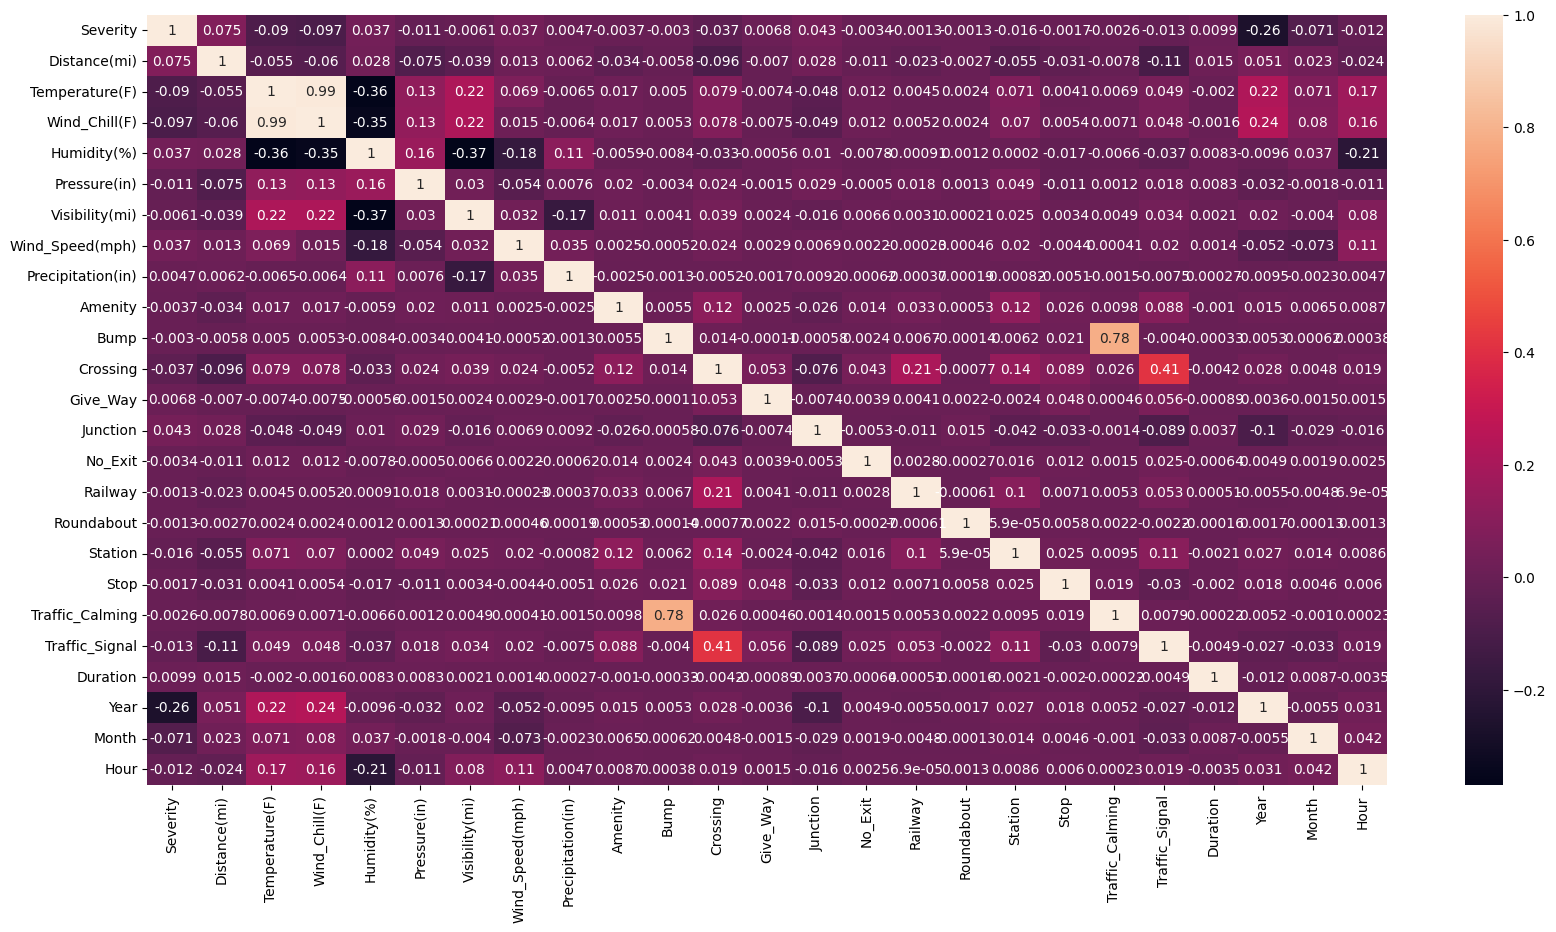

In [13]:
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(accidents_data.corr(numeric_only=True), annot=True);

To facilitate the XGBoost model, I will encode the 'Severity' (target) column using a label encoder. Subsequently, I will split the dataset into training, validation, and testing sets. Additionally, I will identify the numerical and categorical columns in the dataset.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X = accidents_data.drop(columns='Severity')

y_encoder = LabelEncoder()
y = pd.Series(y_encoder.fit_transform(accidents_data['Severity']))

categorical_cols = X.select_dtypes(include='object').columns
numerical_clos = X.select_dtypes(exclude='object').columns

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

Next, I will construct a preprocessing pipeline to prepare the data for further analysis.

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
    ])

numerical_transformer_zero = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('zero_imputer', SimpleImputer(strategy='constant', fill_value=0))
    ])

zero_cols = ['Precipitation(in)']
num_cols = [col for col in numerical_clos if col not in zero_cols]

# Preprocessing for categorical data
ordinal_categorical_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ]) 

onehot_categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]) 

OH_cols = ['Side', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Day_of_Week']
ordinal_cols = [col for col in categorical_cols if col not in OH_cols]


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num_median', numerical_transformer, num_cols),
        ('num_zero', numerical_transformer_zero, zero_cols),
        ('ord_cat', ordinal_categorical_transformer, ordinal_cols),
        ('onehot_cat', onehot_categorical_transformer, OH_cols)
    ])

Let's preprocess the dataset using the preprocessor that was defined above.

In [16]:
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

As our dataset is highly imbalanced, I will proceed with performing undersampling using RandomUnderSampler.

In [17]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

print('Value counts before undersampling:\n', y_train.value_counts().sort_index())

under_sampler_dropna_balanced = RandomUnderSampler(random_state=0, sampling_strategy={1.0:25000, 2.0:25000, 3.0:25000})
X_train_res, y_train_res = under_sampler_dropna_balanced.fit_resample(X_train, y_train)

# over_sampler_dropna_balanced = SMOTE(sampling_strategy={0.0:20000}, random_state=0)
# X_train_dropna_res_balanced, y_train_dropna_res_balanced = over_sampler_dropna_balanced.fit_resample(np.array(X_train_dropna_res_balanced), y_train_dropna_res_balanced)

print('Value counts after undersampling:\n', y_train_res.value_counts().sort_index())

Value counts before undersampling:
 0      15225
1    1303636
2      48362
3      46146
dtype: int64
Value counts after undersampling:
 0    15225
1    25000
2    25000
3    25000
dtype: int64


## Model selection

Now it's time to select an appropriate model for our objective of predicting accident severity. 

I will evaluate the performance of the following models:

1. Logistic Regression
2. Random Forest
3. AdaBoost
4. XGBoost

Let's start by defining a function to assess the performance of the model.

In [18]:
from sklearn.metrics import classification_report

def model_assessment(X_train, y_train, X_val, y_val, model, show_train_report=True):
    """
    Assess performance of a model with validation set by fitting model on the training dataset
    and printing classification report.
    Optionally print the classification report for the training set.
    
    Arguments:
    X_train -- DataFrame with training data
    y_train -- Series with target labels for training data
    X_val -- DataFrame with validation data
    y_val -- Series with target labels for validation data
    model -- classifier to assess
    show_train_report -- set to true to print classification report for the training set 
    
    Returns:
    model -- model fitted on the training dataset
    """
    model.fit(X_train, y_train)

    if show_train_report:
        y_pred_train = model.predict(X_train)
        print('Training set\n', classification_report(y_train, y_pred_train))

    y_pred_val = model.predict(X_val)
    print('Validation set\n', classification_report(y_val, y_pred_val))

    return model

Let's begin by evaluating logistic regression as a potential model.

In [19]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1500, random_state=0)

lr_model = model_assessment(X_train_res, y_train_res, X_val, y_val, lr_model)

Training set
               precision    recall  f1-score   support

           0       0.22      0.04      0.07     15225
           1       0.37      0.46      0.41     25000
           2       0.40      0.54      0.46     25000
           3       0.40      0.35      0.37     25000

    accuracy                           0.38     90225
   macro avg       0.35      0.35      0.33     90225
weighted avg       0.36      0.38      0.36     90225

Validation (test) set
               precision    recall  f1-score   support

           0       0.02      0.05      0.02      5102
           1       0.95      0.41      0.57    434493
           2       0.06      0.52      0.11     16258
           3       0.05      0.42      0.09     15271

    accuracy                           0.41    471124
   macro avg       0.27      0.35      0.20    471124
weighted avg       0.88      0.41      0.54    471124



Based on the evaluation, it is evident that the logistic regression model does not demonstrate strong performance.

Next, let's assess the performance of the random forest model.

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=12, random_state=0)

rf_model = model_assessment(X_train_res, y_train_res, X_val, y_val, rf_model)

Training set
               precision    recall  f1-score   support

           0       0.88      0.86      0.87     15225
           1       0.86      0.89      0.88     25000
           2       0.74      0.88      0.80     25000
           3       0.85      0.68      0.75     25000

    accuracy                           0.82     90225
   macro avg       0.83      0.83      0.83     90225
weighted avg       0.83      0.82      0.82     90225

Validation (test) set
               precision    recall  f1-score   support

           0       0.35      0.80      0.49      5102
           1       0.99      0.83      0.90    434493
           2       0.30      0.82      0.44     16258
           3       0.18      0.61      0.28     15271

    accuracy                           0.82    471124
   macro avg       0.45      0.76      0.53    471124
weighted avg       0.93      0.82      0.86    471124



As we can see, the random forest model demonstrates significantly higher performance compared to the previous model.

Let's identify the important features in the random forest model and create a plot to visualize the feature importances.

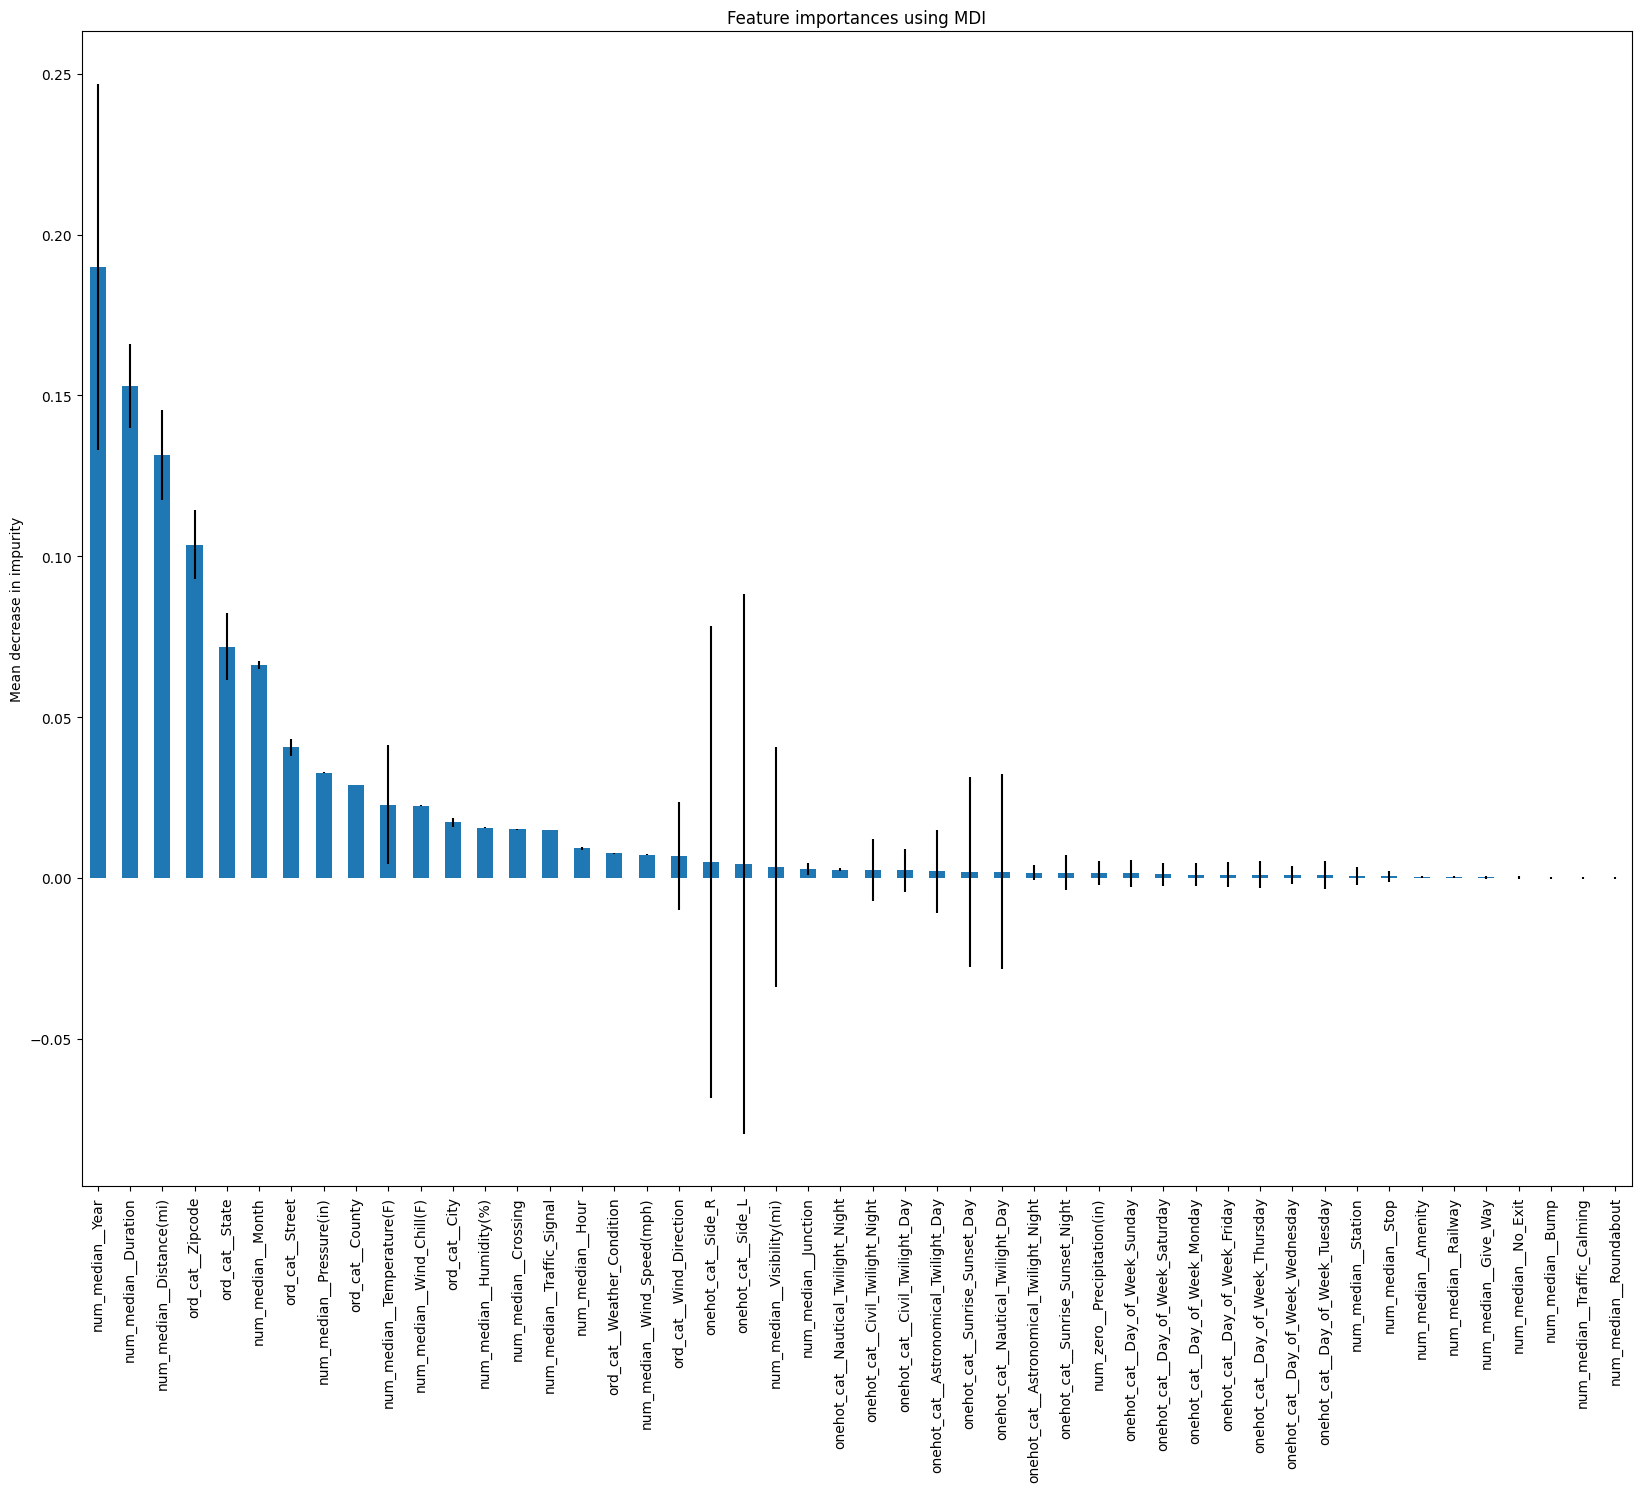

In [21]:
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

rf_importances = pd.Series(importances, index=preprocessor.get_feature_names_out())

plt.figure(figsize=(20,15))
rf_importances.sort_values(ascending=False).plot.bar(yerr=std, ax=plt.gca())
plt.gca().set_title("Feature importances using MDI")
plt.gca().set_ylabel("Mean decrease in impurity");

From the plot, it is evident that some of the most important features are 'Year', 'Duration', 'Distance(mi)', 'Zipcode', 'State', 'Month', and so on. It would be interesting to explore whether training our model on the most important features would lead to an improvement in performance.

Let's retrieve these features from the model.

In [22]:
from sklearn.feature_selection import SelectFromModel

selected = SelectFromModel(RandomForestClassifier(max_depth=12, random_state=0), max_features=23, threshold=1e-6)
selected.fit(X_train_res, y_train_res)

selected_features = preprocessor.get_feature_names_out()[(selected.get_support())]
selected_features

array(['num_median__Distance(mi)', 'num_median__Temperature(F)',
       'num_median__Wind_Chill(F)', 'num_median__Humidity(%)',
       'num_median__Pressure(in)', 'num_median__Visibility(mi)',
       'num_median__Wind_Speed(mph)', 'num_median__Crossing',
       'num_median__Junction', 'num_median__Traffic_Signal',
       'num_median__Duration', 'num_median__Year', 'num_median__Month',
       'num_median__Hour', 'ord_cat__Street', 'ord_cat__City',
       'ord_cat__County', 'ord_cat__State', 'ord_cat__Zipcode',
       'ord_cat__Wind_Direction', 'ord_cat__Weather_Condition',
       'onehot_cat__Side_L', 'onehot_cat__Side_R'], dtype=object)

Now we can train our model using only the 23 selected features.

In [23]:
X_train_selected = X_train_res[:, selected.get_support()]
X_val_selected = X_val[:, selected.get_support()]

rf_model_sel_features = RandomForestClassifier(max_depth=11, random_state=0)

rf_model_sel_features = model_assessment(X_train_selected, y_train_res, X_val_selected, y_val, rf_model_sel_features)

Training set
               precision    recall  f1-score   support

           0       0.88      0.86      0.87     15225
           1       0.85      0.89      0.87     25000
           2       0.73      0.87      0.79     25000
           3       0.84      0.65      0.73     25000

    accuracy                           0.81     90225
   macro avg       0.82      0.82      0.82     90225
weighted avg       0.82      0.81      0.81     90225

Validation (test) set
               precision    recall  f1-score   support

           0       0.36      0.79      0.50      5102
           1       0.99      0.83      0.90    434493
           2       0.31      0.83      0.45     16258
           3       0.17      0.61      0.27     15271

    accuracy                           0.82    471124
   macro avg       0.46      0.77      0.53    471124
weighted avg       0.94      0.82      0.86    471124



As observed, the performance of the model using only the most important features is quite similar. Following the principle of Occam's razor, which suggests favoring simpler models, we should prefer the model with fewer features.

Let's now move forward with implementing the adaptive boosting model.

In [24]:
from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier(n_estimators=100, random_state=0)

ab_model = model_assessment(X_train_res, y_train_res, X_val, y_val, ab_model)

Training set
               precision    recall  f1-score   support

           0       0.79      0.86      0.82     15225
           1       0.61      0.62      0.62     25000
           2       0.63      0.53      0.58     25000
           3       0.43      0.47      0.45     25000

    accuracy                           0.59     90225
   macro avg       0.62      0.62      0.62     90225
weighted avg       0.60      0.59      0.59     90225

Validation (test) set
               precision    recall  f1-score   support

           0       0.26      0.82      0.40      5102
           1       0.98      0.59      0.74    434493
           2       0.27      0.53      0.36     16258
           3       0.05      0.50      0.09     15271

    accuracy                           0.59    471124
   macro avg       0.39      0.61      0.40    471124
weighted avg       0.92      0.59      0.70    471124



Upon assessing the performance of the AdaBoost model on our dataset with all the features, it becomes apparent that it is not performing well. Let's now examine whether there is any improvement when using a dataset containing only the most important features.

In [25]:
ab_model_sel_features = AdaBoostClassifier(n_estimators=100, random_state=0)

ab_model_sel_features = model_assessment(X_train_selected, y_train_res, X_val_selected, y_val, ab_model_sel_features)

Training set
               precision    recall  f1-score   support

           0       0.79      0.86      0.82     15225
           1       0.61      0.61      0.61     25000
           2       0.63      0.53      0.57     25000
           3       0.43      0.48      0.45     25000

    accuracy                           0.59     90225
   macro avg       0.62      0.62      0.61     90225
weighted avg       0.60      0.59      0.59     90225

Validation (test) set
               precision    recall  f1-score   support

           0       0.26      0.82      0.40      5102
           1       0.98      0.58      0.73    434493
           2       0.28      0.53      0.36     16258
           3       0.05      0.51      0.08     15271

    accuracy                           0.58    471124
   macro avg       0.39      0.61      0.39    471124
weighted avg       0.92      0.58      0.69    471124



After evaluating the performance of the AdaBoost model on our dataset, it becomes evident that it is not performing well. Although it shows an improvement compared to logistic regression, it falls significantly short when compared to the random forest model.

Lastly, we can evaluate the XGBoost model to assess its performance.

In [31]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth=6, learning_rate=0.04, n_jobs=-1, random_state=0)

xgb_model = model_assessment(X_train_res, y_train_res, X_val, y_val, xgb_model)

Training set
               precision    recall  f1-score   support

           0       0.83      0.89      0.86     15225
           1       0.83      0.86      0.85     25000
           2       0.73      0.81      0.77     25000
           3       0.77      0.63      0.69     25000

    accuracy                           0.79     90225
   macro avg       0.79      0.80      0.79     90225
weighted avg       0.79      0.79      0.78     90225

Validation (test) set
               precision    recall  f1-score   support

           0       0.32      0.81      0.46      5102
           1       0.99      0.80      0.89    434493
           2       0.31      0.80      0.45     16258
           3       0.15      0.63      0.24     15271

    accuracy                           0.80    471124
   macro avg       0.44      0.76      0.51    471124
weighted avg       0.93      0.80      0.85    471124



As we can see, the XGBoost model demonstrates good performance, although not as impressive as the random forest model. It would be worthwhile to assess its performance on the subset of 23 selected features as well.

In [32]:
xgb_model_sel_features = XGBClassifier(max_depth=6, learning_rate=0.04, n_jobs=-1, random_state=0)

xgb_model_sel_features = model_assessment(X_train_selected, y_train_res, X_val_selected, y_val, xgb_model_sel_features)

Training set
               precision    recall  f1-score   support

           0       0.83      0.89      0.86     15225
           1       0.83      0.86      0.84     25000
           2       0.73      0.81      0.77     25000
           3       0.77      0.62      0.69     25000

    accuracy                           0.78     90225
   macro avg       0.79      0.79      0.79     90225
weighted avg       0.78      0.78      0.78     90225

Validation (test) set
               precision    recall  f1-score   support

           0       0.33      0.80      0.47      5102
           1       0.99      0.80      0.89    434493
           2       0.31      0.80      0.45     16258
           3       0.15      0.63      0.24     15271

    accuracy                           0.80    471124
   macro avg       0.45      0.76      0.51    471124
weighted avg       0.93      0.80      0.85    471124



After evaluating the model trained on the most important features, it is apparent that it does not improve its performance. However, it also does not worsen the performance. Therefore, adhering to Occam's Razor principle, we should prefer the simpler model that includes the subset of important features.

After assessing the performance of multiple models on the validation set, it is evident that the random forest model (we prefer the one using only the important features) has exhibited the highest performance. Now, let's proceed to evaluate its performance on the holdout test set.